# **Independence of binomials trials**

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

tfd = tfp.distributions

---
*Taken from BDA3, Chapter 6, p. 147*

> Consider a sequence of binary outcomes, $y_1, \ldots , y_n$, modeled as a specified number of independent trials with a common probability of success, $\theta$, that is given a uniform prior distribution. The posterior density under the model is $p(\theta|y) \propto \theta^{\sum_{i}y}(1-\theta)^{n-\sum_{i}y}$, which depends on the data only through the sufficient statistic, $\sum_{i=1}^{n}y_i$. Now suppose the observed data are, in order, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0. The observed autocorrelation is evidence that the model is flawed. To quantify the evidence, we can perform a posterior predictive test using the test quantity $T$ = number of switches between 0 and 1 in the sequence. The observed value is $T(y) = 3$, and we can determine the posterior predictive distribution of $T(y^ {rep})$ by simulation. To simulate $y^{rep}$ under the model, we first draw $\theta$ from its $\mathcal{B}eta(8, 14)$ posterior distribution, then draw $y^{rep} = (y^{rep}_1 , \ldots , y^{rep}_{20})$ as independent Bernoulli variables with probability $\theta$. Figure 6.5 displays a histogram of the values of $T(y^{rep}_s)$ for simulation draws $s = 1, \ldots , 10,000$, with the observed value, $T(y) = 3$.

---

In [2]:
y = np.array(
    [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.float32
)

n = len(y)
s = np.sum(y)
Ty = np.sum(np.diff(y) != 0)

a = s + 1
b = n - s + 1

draws = 10000

In [3]:
p = tfd.Beta(concentration1=a, concentration0=b, name='p').sample(draws, seed=0)
yrep = tfd.Bernoulli(probs=p, name='yrep').sample(n, seed=0)

In [4]:
with tf.Session() as sess:
    yrep_ = sess.run(yrep) # ~0.03 s

In [5]:
Tyrep = yrep_.sum(axis=0)  
print('Pr(T(yrep, theta) <= T(y, theta) | y) = {:.2f}'.format(np.mean(Tyrep < Ty)))

Pr(T(yrep, theta) <= T(y, theta) | y) = 0.04


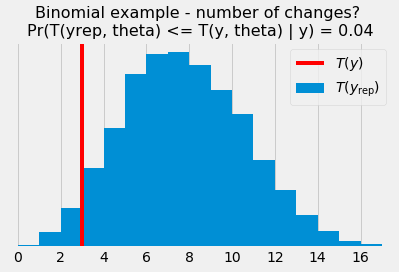

In [6]:
fig, ax = plt.subplots()

ax.hist(Tyrep, np.arange(19), label=r'$T(y_\mathrm{rep})$',)
ax.axvline(Ty, color='red', label='$T(y)$')
ax.set_xlim((-0.5, 17.5))
ax.set_title(
    'Binomial example - number of changes? \n'
    'Pr(T(yrep, theta) <= T(y, theta) | y) = {:.2f}'.format(np.mean(Tyrep < Ty)),
    fontsize=16
)
ax.axes.get_yaxis().set_visible(False)
ax.legend()
fig.tight_layout()